In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


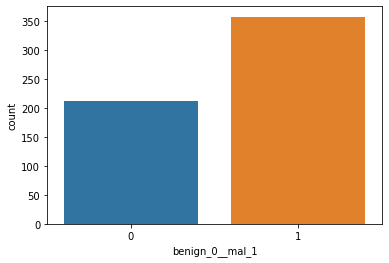

In [ ]:
sns.countplot(x = 'benign_0__mal_1', data = df)

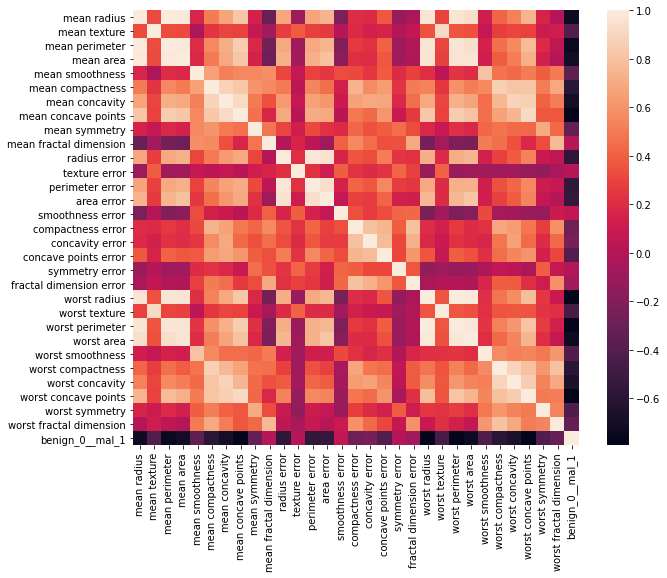

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr())

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

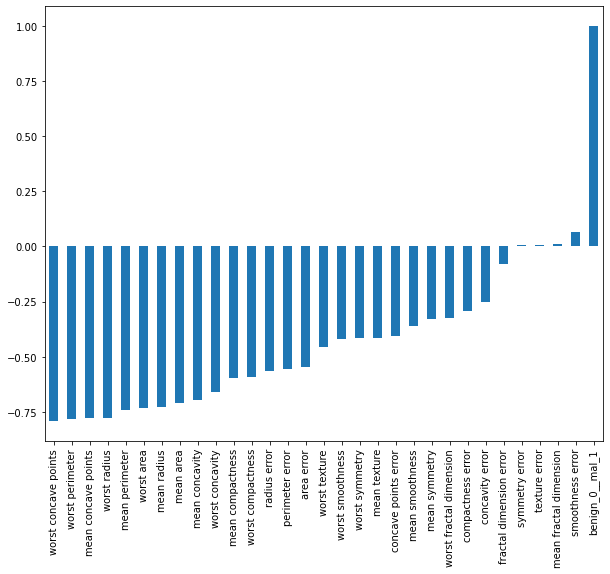

In [ ]:
plt.figure(figsize = (10, 8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

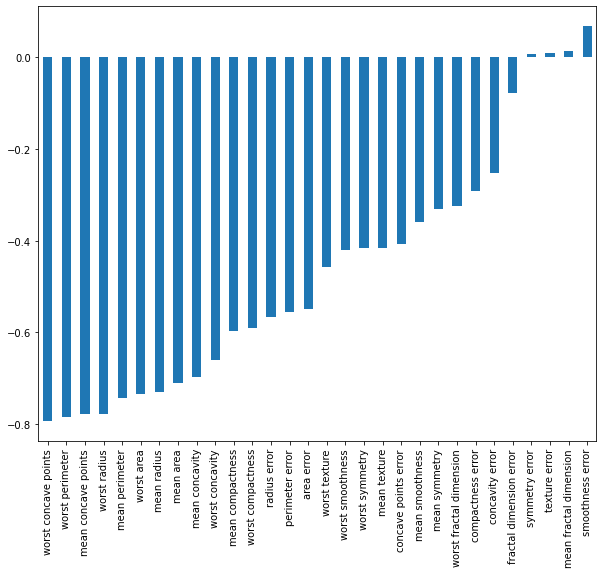

In [ ]:
plt.figure(figsize = (10, 8))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind = 'bar')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))

model.add(Dense(units = 15, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [ ]:
model.fit(x = X_train, 
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test), 
          verbose = 1)

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6884 - val_loss: 0.6673
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6239
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6147 - val_loss: 0.5767
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5688 - val_loss: 0.5229
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5189 - val_loss: 0.4632
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4659 - val_loss: 0.4040
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4172 - val_loss: 0.3515
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3705 - val_loss: 0.3050
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3274 - val_loss: 0.2652
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3014 - val_loss: 0.2362
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

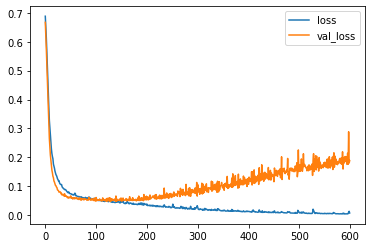

In [ ]:
model_loss.plot()

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))

model.add(Dense(units = 15, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, 
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test), 
          verbose = 1,
          callbacks = [early])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6680 - val_loss: 0.6425
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.5961
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5878 - val_loss: 0.5395
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5365 - val_loss: 0.4877
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4893 - val_loss: 0.4342
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4432 - val_loss: 0.3843
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4002 - val_loss: 0.3402
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3588 - val_loss: 0.3003
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3237 - val_loss: 0.2660
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2955 - val_loss: 0.2396
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

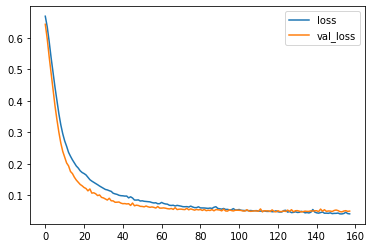

In [ ]:
model_loss.plot()

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x = X_train,
          y = y_train, 
          validation_data = (X_test, y_test),
          epochs = 600,
          verbose = 1,
          callbacks = [early])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7402 - val_loss: 0.6976
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7101 - val_loss: 0.6714
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6821 - val_loss: 0.6541
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6723 - val_loss: 0.6334
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6503 - val_loss: 0.6146
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6373 - val_loss: 0.5952
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6123 - val_loss: 0.5683
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6042 - val_loss: 0.5427
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5821 - val_loss: 0.5201
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5702 - val_loss: 0.4930
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

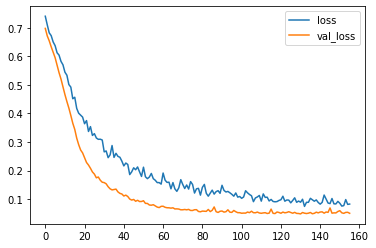

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(accuracy_score(y_test, predictions)*100)

97.9020979020979


In [ ]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 2 87]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

